In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [76]:
data = pd.read_csv('Dữ liệu DIG.csv', index_col='Date', parse_dates=True)
data = data.sort_index()
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8896\671982830.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv('Dữ liệu DIG.csv', index_col='Date', parse_dates=True)


,Price,Open,High,Low,Target,%Change
Date,,,,,,
2017-01-12,10953.7,10449.7,11033.2,10290.6,11.93M,3.77%
2017-04-12,11139.3,11033.2,11245.4,10953.7,6.48M,1.69%
2017-05-12,10608.9,11139.3,11139.3,10608.9,7.29M,-4.76%
2017-06-12,10423.2,10608.9,10661.9,10317.1,8.63M,-1.75%
2017-07-12,10821.1,10396.7,10874.1,10396.7,2.96M,3.82%
...,...,...,...,...,...,...
2023-10-04,17400.0,17600.0,17800.0,17050.0,26.98M,2.35%
2023-11-01,15500.0,15300.0,16000.0,15250.0,7.32M,2.65%
2023-11-04,17500.0,17050.0,17500.0,16200.0,41.25M,0.57%


In [77]:
#Loại bỏ các cột không cần thiết là 'Vol.' và 'Change %'
data = data.drop(['Target', '%Change'], axis=1)
data

,Price,Open,High,Low
Date,,,,
2017-01-12,10953.7,10449.7,11033.2,10290.6
2017-04-12,11139.3,11033.2,11245.4,10953.7
2017-05-12,10608.9,11139.3,11139.3,10608.9
2017-06-12,10423.2,10608.9,10661.9,10317.1
2017-07-12,10821.1,10396.7,10874.1,10396.7
...,...,...,...,...
2023-10-04,17400.0,17600.0,17800.0,17050.0
2023-11-01,15500.0,15300.0,16000.0,15250.0
2023-11-04,17500.0,17050.0,17500.0,16200.0


In [78]:
# Chia tỷ lệ dữ liệu  train, test, validation 7:2:1
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.2)
valid_size = len(data) - train_size - test_size
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
valid_data = data[train_size+test_size:]

In [79]:
# Tạo X_train, y_train
X_train = train_data.drop('Price', axis=1).values
y_train = train_data['Price'].values
# Tạo X_test, y_test
X_test = test_data.drop('Price', axis=1).values
y_test = test_data['Price'].values
# Tạo X_valid, y_valid
X_valid = valid_data.drop('Price', axis=1).values
y_valid = valid_data['Price'].values

In [80]:
# Scale dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = scaler.transform(y_test.reshape(-1,1))
y_valid_scaled = scaler.transform(y_valid.reshape(-1,1))

In [81]:
# Build DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
#
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [94]:
# Train DNN model
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_valid_scaled, y_valid_scaled), epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 0s 10ms/step - loss: 9.0164e-04 - val_loss: 7.1892e-04
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 7.1011e-04 - val_loss: 7.1739e-04
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 8.3435e-04 - val_loss: 4.2251e-04
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 6.4904e-04 - val_loss: 0.0016
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 9.4281e-04 - val_loss: 0.0034
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 8.4912e-04 - val_loss: 0.0024
Epoch 7/100
30/30 [==============================] - 0s 5ms/step - loss: 7.8326e-04 - val_loss: 5.8795e-04
Epoch 8/100
30/30 [==============================] - 0s 5ms/step - loss: 8.5801e-04 - val_loss: 3.7641e-04
Epoch 9/100
30/30 [==============================] - 0s 5ms/step - loss: 8.7931e-04 - val_loss: 4.2896e-04
Epoch 10/100
30/30 [============================

<Axes: >

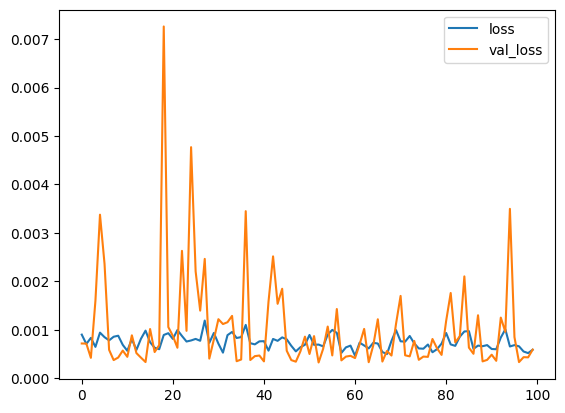

In [95]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [96]:
# Evaluate the model on the test set
score = model.evaluate(X_test_scaled, y_test_scaled)
print('Test loss:', score)

9/9 [==============================] - 0s 2ms/step - loss: 0.0048
Test loss: 0.004759799223393202


In [85]:
# Evaluate DNN model
y_pred = model.predict(X_test_scaled)
mse = np.mean((y_test_scaled - y_pred)**2)
mae = np.mean(abs(y_test_scaled - y_pred.flatten()))
rmse = np.sqrt(mse)
# mape = np.mean(abs((y_test_scaled - y_pred) / y_test_scaled)) * 100
print('MSE: {:.2f}'.format(mse))
print('MAE: {:.2f}'.format(mae))
print('RMSE: {:.2f}'.format(rmse))
# print('MAPE:', mape)

9/9 [==============================] - 0s 2ms/step
MSE: 0.01
MAE: 0.44
RMSE: 0.09
MAPE: 7.3301764054754


In [89]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test_scaled)

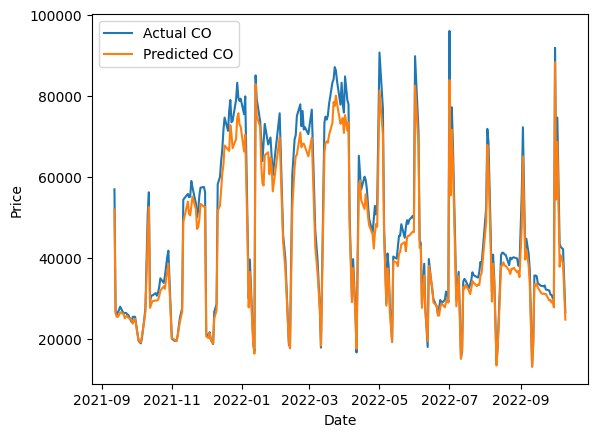

In [93]:
import matplotlib.pyplot as plt
# Vẽ đồ thị so sánh 
plt.plot(test_data.index, y_test, label='Actual CO')
plt.plot(test_data.index, y_pred, label='Predicted CO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()